In [9]:
# packages and modules
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from tqdm.notebook import tqdm
from segnet_utils import load_image_with_resize

In [10]:
# 클래스 디렉토리 데이터 불러오기
data = pd.read_csv(r'C:\Users\user\MY_DL\segmentation\bisenet\cityscapes\class_map.csv', index_col=0)
data

,r,g,b
name,,,
unlabeled,0,0,0
dynamic,111,74,0
ground,81,0,81
road,128,64,128
sidewalk,244,35,232
parking,250,170,160
rail track,230,150,140
building,70,70,70
wall,102,102,156


In [11]:
rgb_data = {name:list(data.loc[name, :]) for name in data.index}
rgb_array = {idx:np.array(rgb) for idx, (_, rgb) in enumerate(rgb_data.items())}

In [12]:
width = 224
height = 224
num_classes = len(data) # 19 classes

In [13]:
def load_image_with_resize(path, n_pixel_L, n_pixel_R, subset='train'):
    image_list, label_list = [], []
    image_files = glob(path+'/images/'+subset+'/**/*.png')
    label_files = glob(path+'/labels/'+subset+'/**/*.png')
    for file in tqdm(image_files):
        img = cv2.imread(file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (n_pixel_L, n_pixel_R), cv2.INTER_NEAREST)
        image_list.append(img)
    for file in tqdm(label_files):
        if 'color.png' in file.split('_'):
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (n_pixel_L, n_pixel_R), cv2.INTER_NEAREST)
            label_list.append(img)
    return np.array(image_list), np.array(label_list)

path = r'C:\Users\user\MY_DL\segmentation\bisenet\cityscapes'
train_image, train_label = load_image_with_resize(path, width, height, subset='train')

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/8925 [00:00<?, ?it/s]

In [14]:
def get_class_total_num(class_name, data_label):
    class_count = 0
    for i in tqdm(range(2975)):
        for j in range(224):
            for k in range(224):
                if (data_label[i][j,k,:] == rgb_data[class_name]).sum() == 3:
                    class_count += 1
    return class_count

In [15]:
unlabeled = get_class_total_num('unlabeled', train_label)
dynamic = get_class_total_num('dynamic', train_label)
ground = get_class_total_num('ground', train_label)
road = get_class_total_num('road', train_label)
sidewalk = get_class_total_num('sidewalk', train_label)
parking = get_class_total_num('parking', train_label)
rail_track = get_class_total_num('rail track', train_label)
building = get_class_total_num('building', train_label)
wall = get_class_total_num('wall', train_label)
fence = get_class_total_num('fence', train_label)
guard_rail = get_class_total_num('guard rail', train_label)
bridge = get_class_total_num('bridge', train_label)
tunnel = get_class_total_num('tunnel', train_label)
pole = get_class_total_num('pole', train_label)
traffic_light = get_class_total_num('traffic light', train_label)
traffic_sign = get_class_total_num('traffic sign', train_label)
vegetation = get_class_total_num('vegetation', train_label)
terrain = get_class_total_num('terrain', train_label)
sky = get_class_total_num('sky', train_label)
person = get_class_total_num('person', train_label)
rider = get_class_total_num('rider', train_label)
car = get_class_total_num('car', train_label)
truck = get_class_total_num('truck', train_label)
bus = get_class_total_num('bus', train_label)
caravan = get_class_total_num('caravan', train_label)
trailer = get_class_total_num('trailer', train_label)
train = get_class_total_num('train', train_label)
motorcycle = get_class_total_num('motorcycle', train_label)
bicycle = get_class_total_num('bicycle', train_label)
license_plate = get_class_total_num('license plate', train_label)

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

  0%|          | 0/2975 [00:00<?, ?it/s]

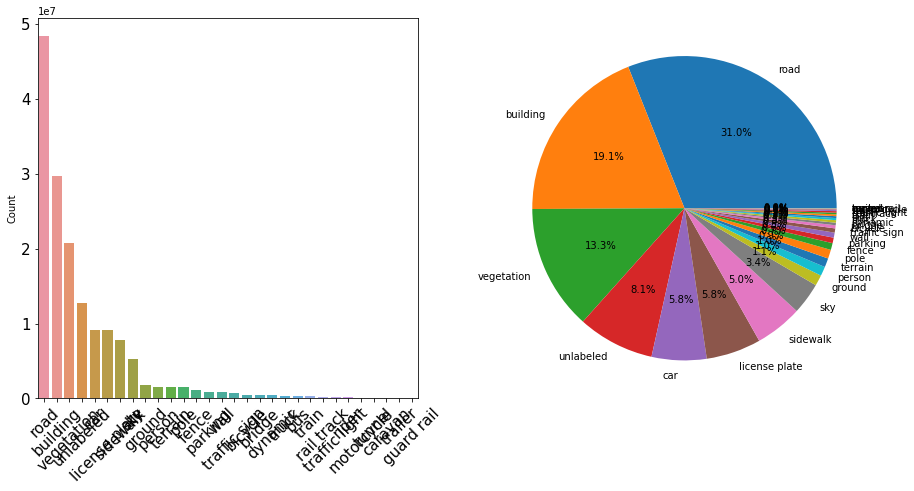

In [16]:
# create data frame
train_class_labels = list(rgb_data.keys())
train_class_count = [unlabeled, dynamic, ground, road, sidewalk, parking,
                     rail_track, building, wall, fence, guard_rail, bridge,
                     tunnel, pole, traffic_light, traffic_sign, vegetation,
                     terrain, sky, person, rider, car, truck, bus, caravan,
                     trailer, train, motorcycle, bicycle, license_plate]

train_class_df = pd.DataFrame(train_class_count, index=train_class_labels, columns=['Count'])
train_class_df = train_class_df.sort_values(by='Count', ascending=False)

# show plots
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(data=train_class_df, x=train_class_df.index, y='Count')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.subplot(122)
plt.pie(train_class_df['Count'], labels=train_class_df.index, autopct='%.1f%%')
plt.show()